In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train= pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Sales-Prediction\Train.csv')
df_test=pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Sales-Prediction\Test.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [7]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [8]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [9]:
df_train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [10]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
df_train.fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test.fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [12]:
df_train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [13]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [14]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


EDA With Seaborn Library

C:\Users\HP\AppData\Local\Temp\ipykernel_16904\209988230.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True)


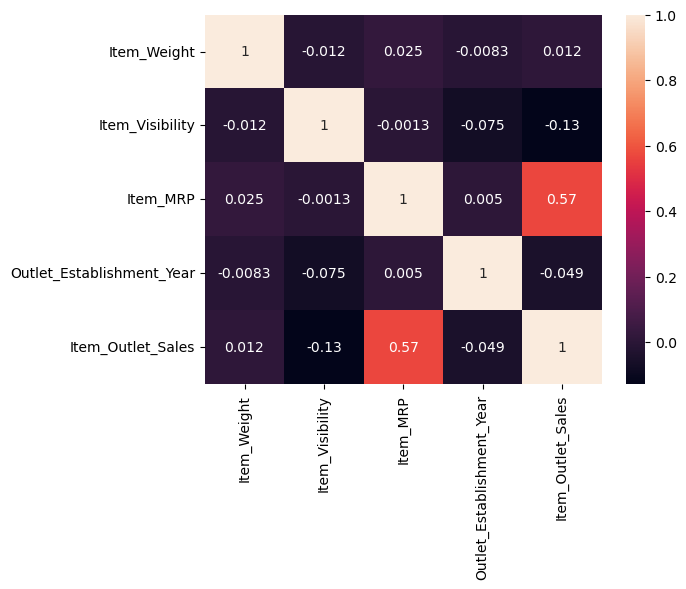

In [15]:
sns.heatmap(df_train.corr(),annot=True)
plt.show()

EDA With klib

In [16]:
!pip install klib joblib

In [17]:
import klib

GridSpec(6, 5)

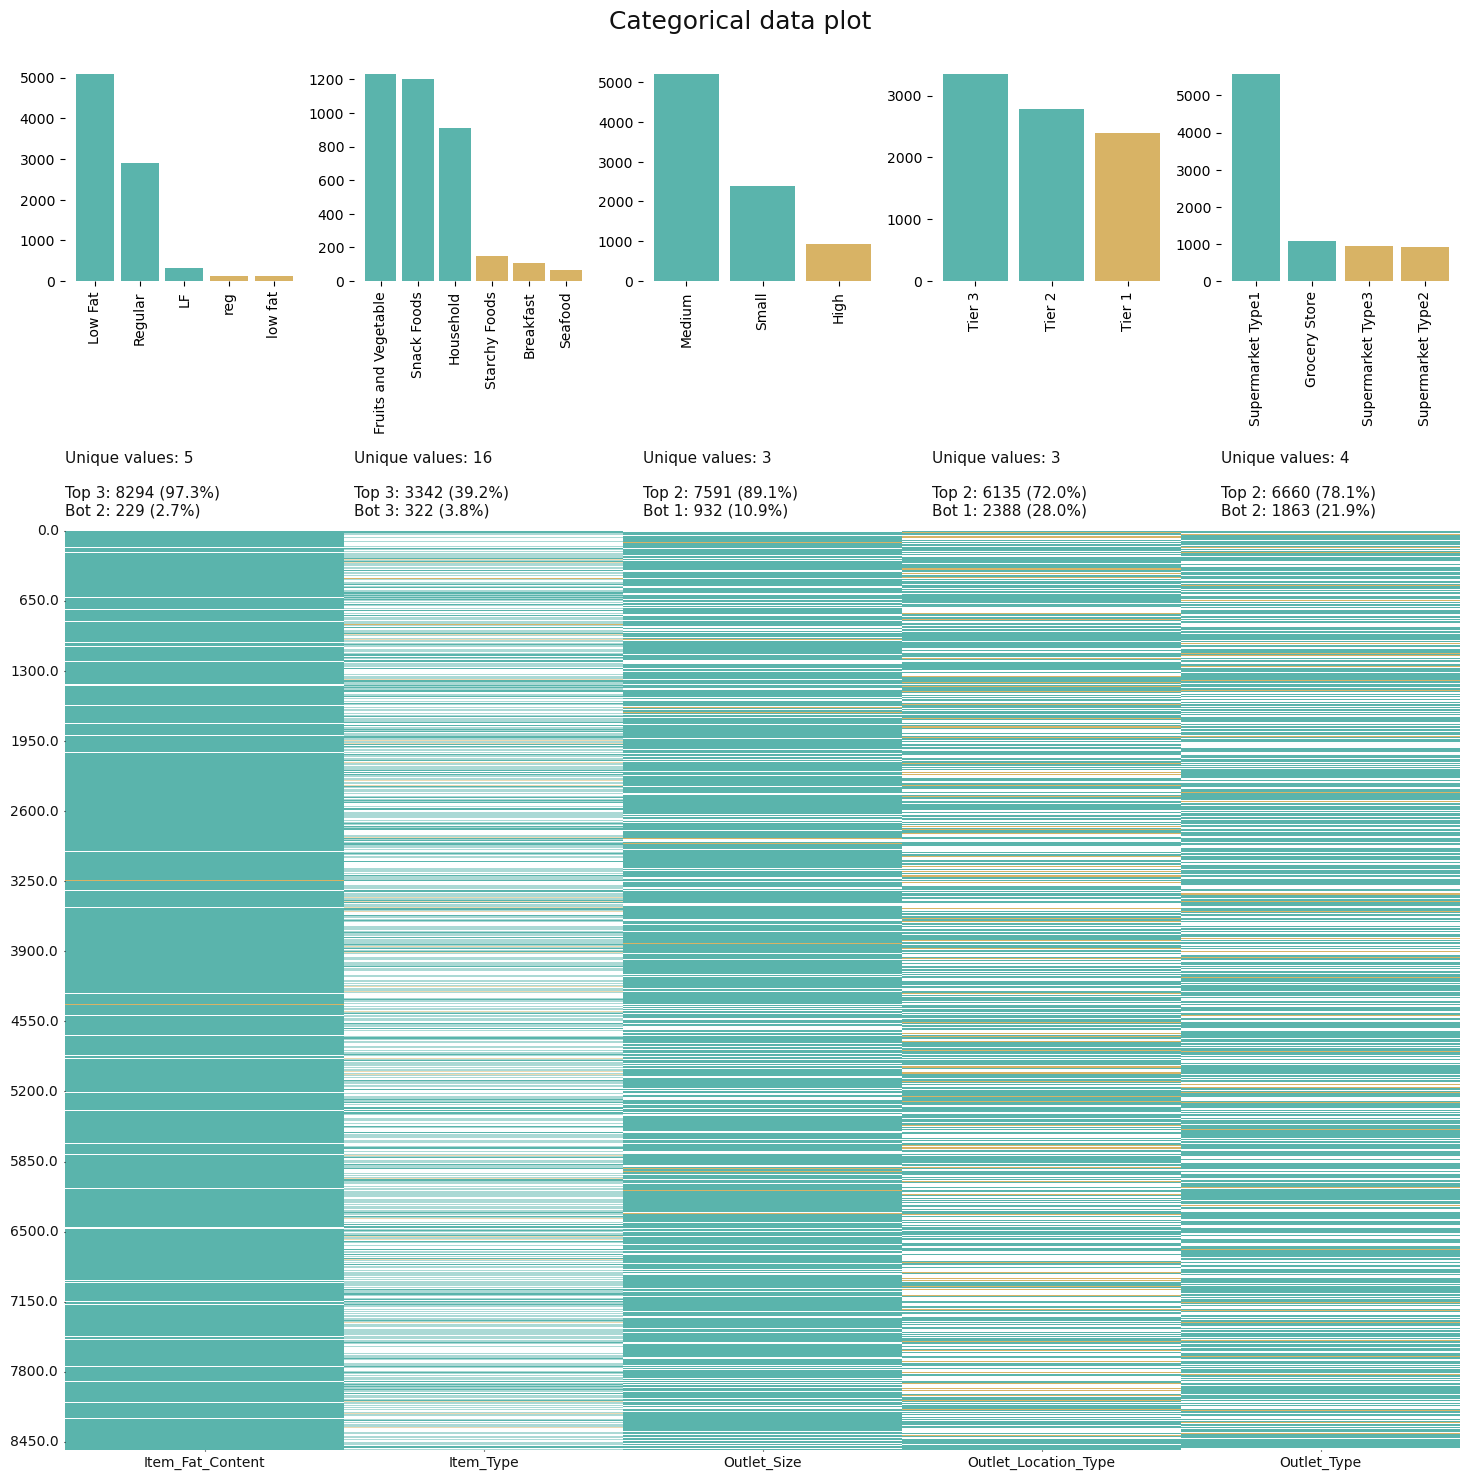

In [18]:
klib.cat_plot(df_train)

In [19]:
klib.corr_mat(df_train)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

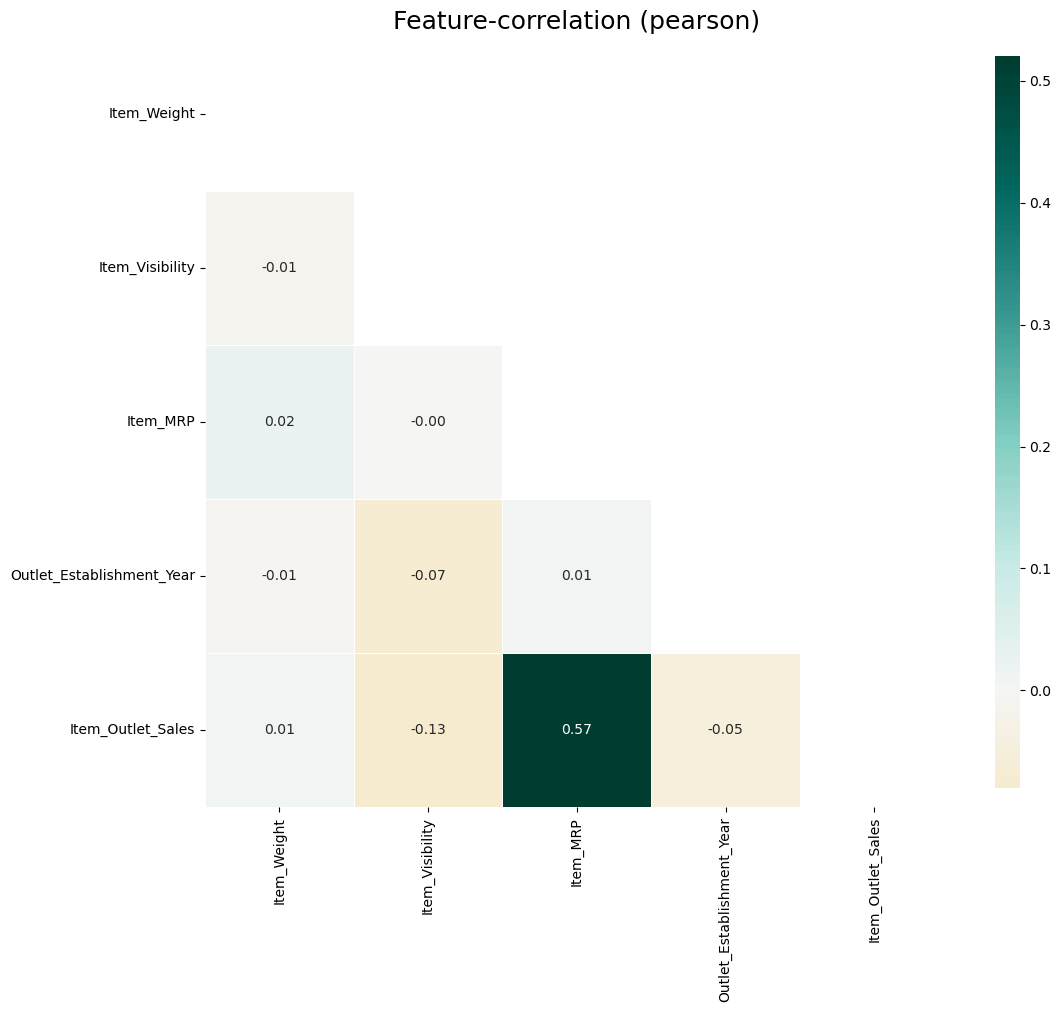

In [20]:
klib.corr_plot(df_train)

In [21]:
klib.convert_datatypes(df_train)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [22]:
klib.drop_missing(df_train)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
df_train['Item_Fat_Content']=le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']=le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']=le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']=le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']=le.fit_transform(df_train['Outlet_Type'])

In [25]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


Train-Test Splitting

In [26]:
X= df_train.drop('Item_Outlet_Sales',axis=1)

In [27]:
Y=df_train['Item_Outlet_Sales']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=101,test_size=0.2)

In [29]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3684,19.250,1,0.101689,4,54.6956,1987,0,2,1
1935,7.630,1,0.061410,14,94.6436,2007,1,1,1
5142,19.350,2,0.065891,10,167.0816,2007,1,1,1
4978,6.380,0,0.031898,4,177.4344,1997,2,0,1
2299,16.700,1,0.022110,4,110.8886,2002,1,1,1
...,...,...,...,...,...,...,...,...,...
599,5.000,1,0.044005,14,188.8530,1997,2,0,1
5695,14.650,1,0.170664,7,56.4614,2002,1,1,1
8006,12.500,1,0.018849,8,96.7384,1997,2,0,1
1361,9.695,2,0.129009,0,226.9404,2007,1,1,1


In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [31]:
X_train_std= sc.fit_transform(X_train)

In [32]:
X_test_std= sc.transform(X_test)

In [33]:
X_train_std

array([[ 1.52290029, -0.57382672,  0.68469729, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603, -0.57382672, -0.09514748, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  0.97378032, -0.00838589, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107, -0.57382672, -0.9191623 , ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428,  0.97378032,  1.21363058, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683, -0.57382672,  1.83915356, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [34]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [35]:
import joblib

In [36]:
joblib.dump(sc,r'C:\Users\HP\OneDrive\Desktop\Sales-Prediction\models\sc.sav')

['C:\\Users\\HP\\OneDrive\\Desktop\\Sales-Prediction\\models\\sc.sav']

Model Building

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [38]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [39]:
Y_pred_lr=lr.predict(X_test_std)

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [41]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5041875762809336
880.9999067141264
1162.4412660891485


In [42]:
joblib.dump(lr,r'C:\Users\HP\OneDrive\Desktop\Sales-Prediction\models\lr.sav')

['C:\\Users\\HP\\OneDrive\\Desktop\\Sales-Prediction\\models\\lr.sav']

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000)

In [ ]:
rf.fit(X_train,Y_train)

In [ ]:
Y_pred_rf= rf.predict(X_test)

In [ ]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")


In [ ]:
grid_search_forest.best_params_

In [ ]:
grid_search_forest.best_score_

In [ ]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [ ]:
r2_score(Y_test,Y_pred_rf_grid)

Saving Model

In [ ]:
import joblib